## NHANES Project

Doug Johnson document

We're trying to replicate and update Hankinson

Import pandas - pd, matplotlib.pyplot - plt

Not sure what %matplotlib inline does

Not sure what nhanes_loader does
Not sure what importlib does
Not sure what importlib.reload(nhanes_loader) does

Import nhanes Household_adult_file; then importlib.reload

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nhanes.household_adult_file import HouseholdAdultFile
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import nhanes.household_adult_file
importlib.reload(nhanes.household_adult_file)


<module 'nhanes.household_adult_file' from '/Users/elizabethjohnson/Documents/nhanes/nhanes/household_adult_file.py'>

That imported adult household - HouseholdAdult File

## Import exam file - exam

In [7]:
from nhanes.exam_file import ExamFile

In [60]:
exam = ExamFile()

In [75]:
exam.data.shape

(31311, 2369)

In [76]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


In [ ]:
exam.data.DMARACER.value_counts()

## Import Household Youth File - youth

In [3]:
from nhanes.household_youth_file import HouseholdYouthFile

In [4]:
youth = HouseholdYouthFile()

In [92]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Rename Household Adult File - nh

In [62]:
nh = HouseholdAdultFile()
nh.data

NameError: name 'HouseholdAdultFile' is not defined

## Combine adult and exam files - adult_exam

match files on the SEQN field

adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

## The merged file does not have data or cols

## Combine youth and exam files - youth_exam

In [9]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [88]:
youth_exam.cols

AttributeError: 'DataFrame' object has no attribute 'cols'

In [10]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 3053)

## Hankinson Exclusion

Ages - have none over 89; 17-89

In [ ]:
adult_exam.HSAGEIR.value_counts()

Check for age of 16

In [205]:
adult_exam.query('HSAGEIR < 17').shape

(0, 3604)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [189]:
adult_exam.query('HSAGEIR>0').shape

(20050, 3604)

Check have Height

In [184]:
adult_exam.query('BMPHT').shape

(20050, 3604)

describe SPPMANEU

Any spirometry  H 16484 

In [209]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

SPPMANEU: successful spirometries -should=16840-370=16470
    

adult_exam.SPPMANEU.value_counts()

any spirometry (in adult age >=17  H 16484  not=88

In [219]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 3604)

In [217]:
adult_exam.query('SPPMANEU < 88').shape

(16840, 3604)

In [220]:
adult_exam.query('SPPMANEU > -1').shape

(18150, 3604)

number 2 or more tests  H 277, 16207  we have 16470 (+263)

In [127]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 3604)

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [224]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR >89').shape

(84, 3604)

In [147]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 3604)

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [228]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [226]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 3604)

In [227]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape

(15747, 3604)

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [235]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [242]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 3604)

In [243]:
adult_exam.query('HAR1 == 2').shape

(10235, 3604)

In [245]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 3604)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [150]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [275]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 3604)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [273]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [276]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 3604)

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  BUT this question only on Youth.  Adult has question SPPQ3 smoked, heavy meal, meds to help breathing past hour; also SPPQ4 past few day cough/cold/other acute illness; also SPPQ5 past 3 weeks respiratory infection (so want these = 2)

In [ ]:
We have 5965 1669 when exclude all 3

In [277]:
adult_exam.SPPQ3.value_counts()

2.0    16565
8.0     1320
1.0      265
Name: SPPQ3, dtype: int64

exclude just Q3 (past hour smoked/heavy meal/med for breathing - H not smoke 5d 7115 408 we have 7406 228 lower (+291, -180)

In [281]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').shape

(7406, 3604)

In [278]:
adult_exam.SPPQ4.value_counts()

2.0    13557
1.0     3273
8.0     1320
Name: SPPQ4, dtype: int64

exclude Q3 and Q4

In [282]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').shape

(6120, 3604)

We have 6120 1286 for exclude Q3 and Q4

In [279]:
adult_exam.SPPQ5.value_counts()

2.0    15970
8.0     1320
1.0      860
Name: SPPQ5, dtype: int64

In [280]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 3604)

In [ ]:
So go back to not excluding based on Q3 Q4 Q5 

In [338]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 3604)

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [340]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2').shape

(7158, 3604)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [341]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape

(6962, 3604)

and emphysema  H 15, 6465  HAC1G == 2


In [342]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 3604)

and cancer H 0 6465

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [321]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [343]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 3604)

and wheezing 6 month  H 419 6046  HAL6

In [310]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [344]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 3604)

and whistling or wheezing  H 112 5934  HAL10

In [345]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 3604)

and persistent cough H 158, 5776  HAL1

In [346]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 3604)

and persistent phlegm H 125  5776  HAL 3

In [347]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 3604)

and moderate shortness of breath H  848  4803  HAL5

In [314]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [348]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 3604)

In [337]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 3604)

and age > 80  H  139 4634  HSAGEIR


In [349]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

(4944, 3604)

Set AdultFinal = the file after all exclusion criteria

In [ ]:
set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

## FINAL # above - H 4,944

## Now do youth exclusion

In [16]:
youth_exam.shape

(13944, 3053)

age 8-17

In [14]:
youth_exam.query('7 < HSAGEIR < 18').shape

(5365, 3053)

Youth ethnicity

In [18]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry unusable <2 curves

In [21]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 3053)

In [ ]:
ethnicity other

In [23]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 3053)

try B1 ever smoker  not work exclude too many

In [56]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 3053)

smoker B1 and B3 ** B1 too many; B3 (>5 pks) OK

In [26]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 3053)

smoked 5 days B11 and B27

In [32]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 3053)

and B27

In [33]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

(3593, 3053)

asthma E1g

In [35]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 3053)

chronic bronchitis E1h

In [37]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 3053)

wheezing 12 months

In [39]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 3053)

wheezing apart from colds

In [40]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 3053)

Youth 12 years and older with above H 1298

In [49]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 3053)

and not persistent cough G2 H 2816 **I all age

In [50]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 3053)

and not persistent phlegm G4 H 2806

In [51]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 3053)

and Youth age 8-under 12

In [52]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 3053)

and not persistent cough G6 and G7

In [112]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 3053)

## Final Youth is file after all of exclusion n=2812

In [113]:
# display
youth_exam

,DMPFSEQ,DMPSTAT,DMARETHN,DMARACER,DMAETHNR,HSSEX,HSDOIMO,HSAGEIR,HSAGEU,HSAITMOR,...,PFPTTAND,PFPOWALK,PFPRWALK,PFPTWLKA,PFPNSTPA,PFPTWLKB,PFPNSTPB,PFPPAIN,PFPDEVIC,PFPTECH
SEQN,,,,,,,,,,,,,,,,,,,,,
7,855,2,2,2,3,2,2,3,2,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4160,2,1,1,3,2,2,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,9447,2,1,1,3,1,7,1,2,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,6793,2,1,1,3,2,11,16,2,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8226,2,3,1,1,1,2,16,2,198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,12000,2,1,1,3,2,7,9,2,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53596,16196,2,1,1,3,1,5,1,2,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53617,17893,2,2,2,3,1,6,7,2,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
youthfinal = youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555')

It shows counts of a variable in youthfinal

In [72]:
youthfinal.DMARETHN.value_counts()

2    1049
3    1023
1     740
Name: DMARETHN, dtype: int64

## Try other youthfinal; cannot get to work

In [121]:
youth_exam.query('7 < HSAGEIR < 18' and '2 <= SPPMANEU < 88')

,DMPFSEQ,DMPSTAT,DMARETHN,DMARACER,DMAETHNR,HSSEX,HSDOIMO,HSAGEIR,HSAGEU,HSAITMOR,...,PFPTTAND,PFPOWALK,PFPRWALK,PFPTWLKA,PFPNSTPA,PFPTWLKB,PFPNSTPB,PFPPAIN,PFPDEVIC,PFPTECH
SEQN,,,,,,,,,,,,,,,,,,,,,
14,6793,2,1,1,3,2,11,16,2,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8226,2,3,1,1,1,2,16,2,198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,7139,2,1,1,3,2,10,10,2,127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1254,2,3,1,1,2,3,11,2,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,8745,2,3,1,1,2,4,14,2,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53576,13535,2,2,2,3,2,11,10,2,129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53579,18587,2,2,2,3,1,12,15,2,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53587,15339,2,3,3,1,2,1,12,2,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
youthfinal = youth_exam.query('7 < HSAGEIR < 18' and '2 <= SPPMANEU < 88')

In [123]:
youthfinal.cols

AttributeError: 'DataFrame' object has no attribute 'cols'

In [117]:
# display
youth_exam

,DMPFSEQ,DMPSTAT,DMARETHN,DMARACER,DMAETHNR,HSSEX,HSDOIMO,HSAGEIR,HSAGEU,HSAITMOR,...,PFPTTAND,PFPOWALK,PFPRWALK,PFPTWLKA,PFPNSTPA,PFPTWLKB,PFPNSTPB,PFPPAIN,PFPDEVIC,PFPTECH
SEQN,,,,,,,,,,,,,,,,,,,,,
7,855,2,2,2,3,2,2,3,2,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4160,2,1,1,3,2,2,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,9447,2,1,1,3,1,7,1,2,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,6793,2,1,1,3,2,11,16,2,196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,8226,2,3,1,1,1,2,16,2,198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53591,12000,2,1,1,3,2,7,9,2,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53596,16196,2,1,1,3,1,5,1,2,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53617,17893,2,2,2,3,1,6,7,2,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
youthfinal = pd.DataFrame(youth_exam.query('7 < HSAGEIR < 18') and query('2 <= SPPMANEU < 88') and query('DMARETHN < 4')

SyntaxError: unexpected EOF while parsing (<ipython-input-108-e77f3220c880>, line 1)

In [110]:
youthfinal = youth_exam.query('7 < HSAGEIR < 18' and '2 <= SPPMANEU < 88')

In [111]:
youthfinal.cols

AttributeError: 'DataFrame' object has no attribute 'cols'

In [ ]:
youthfinal = youth.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555')

In [85]:
youthf = youth_exam

In [ ]:
youth_exam.data

However cannot get it to do other things

In [ ]:
youthfinal.data

In [ ]:
youthfinal.hist_amount('DMARACER', outliers=25)

In [94]:
youthfinal.cols

AttributeError: 'DataFrame' object has no attribute 'cols'

Try for youth file

In [93]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## How give attribute data to youthfinal?

For adults uses dataframe exam

In [ ]:
youthfinal.data['PEFROVERFVC'] = youthfinal.data.SPPPEAK / youthfinal.data.SPPFVC

In [ ]:
YouthFinal.data.PEFROVERFVC.hist(bins='auto', range=(0,5))

.describe() returns statistics about numerical columns

describes apply function to dataset to transform it - then append to DataFrame in a new column

The data frame has object geography

def mapgeography(x):
  If x =="City"
    return 1
  else:
    return 0
    
df['geography_mapped_value') = df.geopgraphy_type.apply(mapgeography)

then df.geography.mapped_value.value_counts()
  to get list of values
  
Could use this method to append values of exclusion criteria, such as

def map1(x):
  If x == 1
    return 1
  else:
    return 0
    
then df['XHAR1'] = df.HAR1.apply(map1)

or for maplt2

def maplt2(x):
  If x <2
    return 1
  else:  
    return 0
    
then df['XSPPMANEU'] = df.SPPMANEU.apply(maplt2)    
    
    

In [ ]:
number = 7

In [ ]:
print (number)

In [ ]:
print ('SPPMANEU < 2')

## Exclusion Youth

youth_exam.query('HSAGEIR < 17').shape

## Reviewing adult file

In [90]:
cols = nh.cols
cols

NameError: name 'nh' is not defined

In [ ]:
cols[cols.description.str.contains('(?:smok|cig)')]

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

In [61]:
nh.hist_amount('DMARACER', outliers=25);

NameError: name 'nh' is not defined

In [ ]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

In [ ]:
exam.data.HAR1.value_counts();

Test Markdown

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

In [ ]:
nh.hist_amount('DMARACER', outliers=25);

In [ ]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

In [63]:
exam.data['PEFROVERFVC'] = exam.data.SPPPEAK / exam.data.SPPFVC

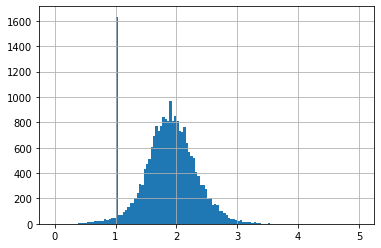

In [20]:
exam.data.PEFROVERFVC.hist(bins='auto', range=(0,5))

In [ ]:
exam.data[(exam.data.HSSEX == 2) & (exam.data.DMARACER == 1)].PEFROVERFVC.hist(bins='auto')

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

In [124]:
import matplotlib.pyplot as plt

In [130]:
import numpy as np

Need install scipy  -- pip install --user scipy  Directions in scipy.org/install.html

In [135]:
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'scipy'

In [137]:
import SciPy as sc

ModuleNotFoundError: No module named 'SciPy'

In [131]:
from lmfit import model

ModuleNotFoundError: No module named 'lmfit'

In [126]:
from numpy import exp, loadtxt, pi, sqrt

In [128]:
from numpy import exp, linspace, random

In [129]:
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'scipy'

In [127]:
from lmfit import Model

ModuleNotFoundError: No module named 'lmfit'